# Multi-class Image Classification using CNN and Pretrained VGG16





This notebook provides two  approaches to a multi-class classification for face obstruction with 6 classes

Data is being fed from a directory with 6 folders, one for each class, the validation data split is done using keras validation_split.

Convolutional Neural Network (CNN): The first approach employs a very simple Convolutional Neural Network (CNN) built from scratch. This model is appropriate for those who are starting with image classification tasks and want to understand the building blocks of how CNNs work.

Transfer Learning with VGG16: The second approach uses the VGG16 model, pretrained on the ImageNet dataset. Transfer learning allows to leverage the features learned by VGG16 on a large dataset, applying them to a specific task. This can yield significant improvements in accuracy, especially if the dataset is relatively small.

The dataset for this project is organized into six separate folders, each corresponding to one of the classes. ImageDataGenerator from Keras is used to load images from these directories, and data is split into training and validation sets using the validation_split argument.

# Simple Convolutional Neural Network (CNN) multi-class classifier (6 classes)


In [54]:
#Import necessary libraries
import cv2
from matplotlib import pyplot as plt
import os
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

## Dataset

In [77]:
images_path = "./data"
training_dataset = keras.preprocessing.image_dataset_from_directory(
  images_path,
  labels='inferred',
  label_mode='categorical',
  color_mode="rgb",
  batch_size=32,
  image_size=(150, 150),
  subset="training",
  validation_split=0.2,
  seed=1
)

test_dataset = keras.preprocessing.image_dataset_from_directory(
  images_path,
  labels='inferred',
  label_mode='categorical',
  color_mode="rgb",
  batch_size=32,
  image_size=(150, 150),
  subset="validation",
  validation_split=0.2,
  seed=1
)


Found 19163 files belonging to 6 classes.
Using 15331 files for training.
Found 19163 files belonging to 6 classes.
Using 3832 files for validation.


## Checking class names and their indexes for later image loader

In [78]:
# Get the class names
class_names = training_dataset.class_names

# Get the number of classes
num_classes = len(class_names)

# Create a dictionary of class indices
class_indices = {class_name: index for index, class_name in enumerate(class_names)}

# Display the class indices and numbers
for class_name, class_index in class_indices.items():
    print(f"Class: {class_name}, Index: {class_index}")

print(f"Number of Classes: {num_classes}")


Class: glasses, Index: 0
Class: hand, Index: 1
Class: mask, Index: 2
Class: none, Index: 3
Class: other, Index: 4
Class: sunglasses, Index: 5
Number of Classes: 6


# Model structure

In [79]:
# Define the model
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D(pool_size=(2, 2)),
  
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  
  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.3),
  
  Dense(6, activation='softmax'),  # final layer has 6 neurons (one for each category) with softmax activation
])

# Define the filename template for saving the models
checkpoint_template = os.path.join(save_dir, "model_epoch{epoch:02d}.h5")

# Create a ModelCheckpoint callback to save the model
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_template, save_freq="epoch")

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)    

In [80]:
# Set epochs number
epochs_num = 20

# Train the model
history = model.fit(
  training_dataset,
  validation_data=test_dataset,
  epochs=epochs_num,
    callbacks=[checkpoint_callback]
)

Epoch 1/20
480/480 [==============================] - 15s 30ms/step - loss: 5.6256 - accuracy: 0.7666 - val_loss: 0.4485 - val_accuracy: 0.8335
Epoch 2/20
480/480 [==============================] - 14s 30ms/step - loss: 0.4168 - accuracy: 0.8494 - val_loss: 0.4860 - val_accuracy: 0.8301
Epoch 3/20
480/480 [==============================] - 13s 26ms/step - loss: 0.2918 - accuracy: 0.8909 - val_loss: 0.4390 - val_accuracy: 0.8463
Epoch 4/20
480/480 [==============================] - 13s 27ms/step - loss: 0.2175 - accuracy: 0.9189 - val_loss: 0.4944 - val_accuracy: 0.8460
Epoch 5/20
480/480 [==============================] - 13s 27ms/step - loss: 0.2143 - accuracy: 0.9230 - val_loss: 0.4745 - val_accuracy: 0.8591
Epoch 6/20
480/480 [==============================] - 12s 25ms/step - loss: 0.1550 - accuracy: 0.9459 - val_loss: 0.5207 - val_accuracy: 0.8562
Epoch 7/20
480/480 [==============================] - 15s 31ms/step - loss: 0.1554 - accuracy: 0.9459 - val_loss: 0.5924 - val_accuracy:

In [81]:
# Save the model
model.save('model.h5')


## Plotting the model performance over epochs

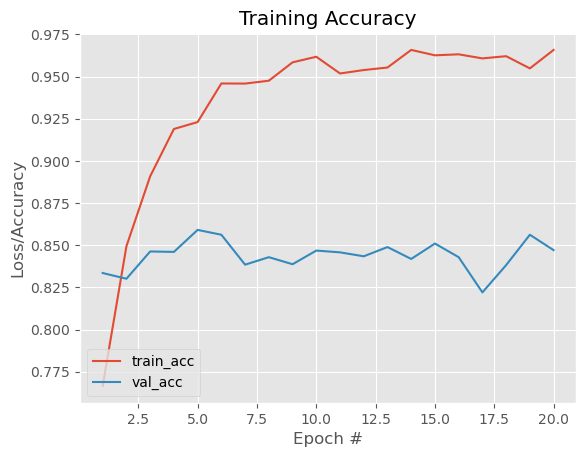

In [82]:
# plot the training accuracy
N = epochs_num+1
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

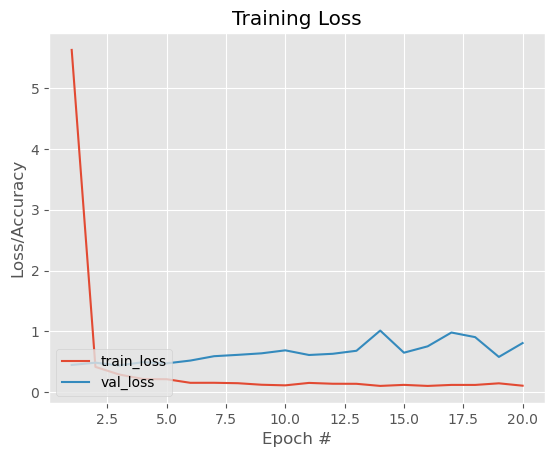

In [85]:
# plot the training loss
N = epochs_num+1
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(1, N), history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

### It can be seen that the model quickly learns the data but starts to overfit after epoch 3 altough highest validation accuracy occured in epoch 6 and 19.

## Template for loading the model 

In [37]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('model.h5')


# Template for classifying a test image

1/1 [==============================] - 0s 17ms/step
The model predicts this image is a: sunglasses


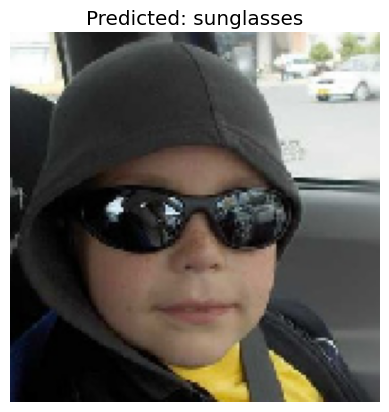

In [42]:
import matplotlib.pyplot as plt

# Load the image
img_path = 'test.jpg'
img = image.load_img(img_path, target_size=(150, 150))

# Preprocess the image
input_arr = keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr])

# Make the prediction
predictions = loaded_model.predict(input_arr)

# Decode the prediction
class_names = ['glasses', 'hand', 'mask', 'none', 'other', 'sunglasses']  # order of labels may vary based on your dataset, ensure the correct order
predicted_class = class_names[np.argmax(predictions)]
print("The model predicts this image is a:", predicted_class)

# Show the image
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()



# VGG16 multi-class classifier (6 classes)



In [55]:
#Import necessary libraries
import cv2
from matplotlib import pyplot as plt
import os
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input

## Dataset

In [56]:
# Define the directory to save the models
save_dir = "./saved_models"
os.makedirs(save_dir, exist_ok=True)
images_path = "./data"

training_dataset = keras.preprocessing.image_dataset_from_directory(
    images_path,
    labels='inferred',
    label_mode='categorical',
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    subset="training",
    validation_split=0.2,
    seed=1
)

test_dataset = keras.preprocessing.image_dataset_from_directory(
    images_path,
    labels='inferred',
    label_mode='categorical',
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    subset="validation",
    validation_split=0.2,
    seed=1
)

Found 19163 files belonging to 6 classes.
Using 15331 files for training.
Found 19163 files belonging to 6 classes.
Using 3832 files for validation.


## Model structure

In this implementation, we use the power of transfer learning by employing a pre-trained VGG16 model for feature extraction. To further enhance the model's performance, we also introduce a data augmentation layer that increases the diversity and quantity of training data. This, reduces overfitting and improves generalization capabilities.

In [57]:
# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False)

# Freeze the weights of the pre-trained layers
base_model.trainable = False

# Define the data augmentation
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.2),
])

# Input as the first layer of the model and data augmentation layer, then VGG16, flatten, a dense layer and droupout layer and final layer
model = Sequential([
    Input(shape=(150, 150, 3)),  # specify the input shape here
    data_augmentation,
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax') # final layer has 6 neurons (one for each category) with softmax activation
])


# Define the filename template for saving the models
checkpoint_template = os.path.join(save_dir, "model_VGG16_epoch{epoch:02d}.h5")

# Create a ModelCheckpoint callback to save the model
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_template, save_freq="epoch")


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()




Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_22 (Sequential)  (None, 150, 150, 3)       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_14 (Flatten)        (None, 8192)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 6)                 3078      
                                                                 
Total params: 18,912,582
Trainable params: 4,197,894


In [58]:
# Set epochs number
epochs_num = 10

# Train the model
history = model.fit(
    training_dataset,
    validation_data=test_dataset,
    epochs=epochs_num,
    callbacks=[checkpoint_callback]
)

Epoch 1/10
480/480 [==============================] - 98s 199ms/step - loss: 1.5028 - accuracy: 0.8118 - val_loss: 0.4102 - val_accuracy: 0.8787
Epoch 2/10
480/480 [==============================] - 93s 194ms/step - loss: 0.4620 - accuracy: 0.8559 - val_loss: 0.3728 - val_accuracy: 0.8894
Epoch 3/10
480/480 [==============================] - 97s 203ms/step - loss: 0.3917 - accuracy: 0.8722 - val_loss: 0.4009 - val_accuracy: 0.8914
Epoch 4/10
480/480 [==============================] - 98s 203ms/step - loss: 0.3694 - accuracy: 0.8805 - val_loss: 0.3813 - val_accuracy: 0.8849
Epoch 5/10
480/480 [==============================] - 96s 200ms/step - loss: 0.3390 - accuracy: 0.8832 - val_loss: 0.3513 - val_accuracy: 0.8993
Epoch 6/10
480/480 [==============================] - 104s 216ms/step - loss: 0.3287 - accuracy: 0.8884 - val_loss: 0.3401 - val_accuracy: 0.9006
Epoch 7/10
480/480 [==============================] - 98s 203ms/step - loss: 0.3269 - accuracy: 0.8913 - val_loss: 0.3794 - val_a

In [59]:
# Save the model
model2.save('model_VGG16.h5')

## Plotting the model performance over epochs

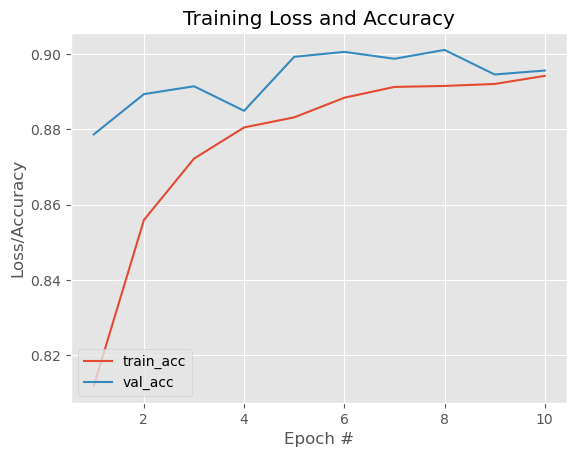

In [71]:
# plot the training accuracy
N = epochs_num+1
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

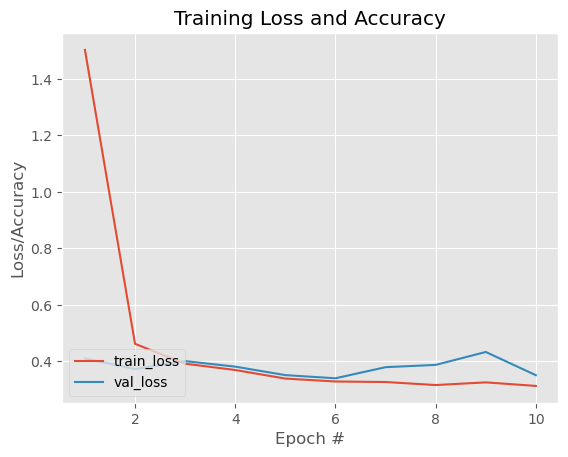

In [70]:
# plot the training loss
N = epochs_num+1
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(1, N), history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

### From this graph, it can be seen that propably the best model would be epoch 6
### It has one of the highest accuracy scores of 0.9006 and the lowest validation loss of 0.3401
### Afterwards the model seems to be overfitting leading to lower validation accuracy and higher loss

## Template for loading the model 

In [21]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('model_VGG16.h5')

# Load one of the checkpoints of the saved model, in this case epoch 2
loaded_model = load_model('./saved_models/model_VGG16_epoch02.h5')